In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib as mpl
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as plt

import numpy as np
from scipy import stats
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn import preprocessing

%matplotlib inline

import scipy.stats as stats

import sklearn
import statsmodels.api as sm

from scipy.stats import mode

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")



C:\Users\Supreetha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data1 = pd.read_csv('C:/Users/Supreetha/Box Sync/MSSE/THIRD_SEM/257_ML/datasets/UsedCarMaster.csv')
df1 = data1.dropna(subset=['maker'])

In [3]:
data1.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [4]:
#Since this dataset is huge and had too many anomalies, we came to a conclusion, that we will look at the data, 
#only for following features :maker, model, mileage, manufacture year, price, fuel type.

data1_subset = data1[['maker', 'model', 'mileage', 'manufacture_year', 'price_eur', 'fuel_type']]


In [5]:
#We did a quick analysis on the number of vehicles spread across years and saw that there was good enough data  for cars
#that were manufactured after 2010.
#We also looked at the distribution of data for price, we found out that majority of the dataset was
#between the range 5000 to 100000. So we applied all the filters to eventually end up at well distributed dataset.

data1_subset = data1_subset.drop(data1_subset[data1_subset.manufacture_year < 2010].index)
data1_subset = data1_subset.drop(data1_subset[data1_subset.price_eur < 5000].index)
data1_subset = data1_subset.drop(data1_subset[data1_subset.price_eur > 100000].index)

# 3. Drop rows where the maker is null: Reduced to 4473950
data1_subset['maker'].dropna(inplace=True)
data1_subset['model'].dropna(inplace=True)

data1_subset['maker'] = data1_subset.maker.astype('category')
data1_subset['model'] = data1_subset.model.astype('category')

In [8]:
data1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508946 entries, 0 to 1048573
Data columns (total 6 columns):
maker               368656 non-null category
model               265056 non-null category
mileage             499369 non-null float64
manufacture_year    450673 non-null float64
price_eur           508946 non-null float64
fuel_type           508946 non-null object
dtypes: category(2), float64(3), object(1)
memory usage: 20.9+ MB


In [9]:
# Used 38 unique makers
maker_list = data1_subset['maker'].unique().tolist()
print (len(maker_list))
print(maker_list)

38
['ford', 'skoda', 'bmw', 'kia', nan, 'suzuki', 'rover', 'citroen', 'audi', 'toyota', 'seat', 'hyundai', 'nissan', 'chevrolet', 'opel', 'mercedes-benz', 'volvo', 'fiat', 'honda', 'dodge', 'subaru', 'mitsubishi', 'mazda', 'chrysler', 'porsche', 'jaguar', 'jeep', 'mini', 'lancia', 'lexus', 'smart', 'tesla', 'maserati', 'hummer', 'isuzu', 'lamborghini', 'bentley', 'lotus']


In [10]:
# With 437 different cars
model_list = data1_subset['model'].unique().tolist()
print (len(model_list))

438


In [12]:
max_year = data1_subset['manufacture_year'].max()
min_year = data1_subset['manufacture_year'].min()
max_year


2016.0

In [13]:
min_year

2010.0

In [ ]:
# The current data set has the highest number of cars manufactured in 2015. this is in sync with the real world where
# the year 2015 had the highest number of cars manufactured.
# [Reference] : https://www.washingtonpost.com/business/economy/us-car-sales-hit-record-high-in-2015/2016/01/05/363aaf30-af14-11e5-b820-eea4d64be2a1_story.html?noredirect=on&utm_term=.958cb298154d

#Uncomment in the end coz it takes a while to run
#mode(data1_subset['manufacture_year'])

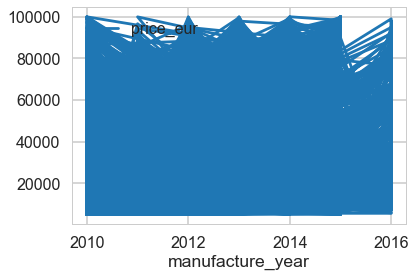

In [14]:
mpl.rcParams['agg.path.chunksize'] = 10000
ax = data1_subset.plot(x="manufacture_year",y="price_eur")

In [15]:
makes_list = ['skoda', 'kia', 'suzuki', 'rover', 'citroen',  'seat', 'opel' ,
                         'volvo', 'fiat', 'dodge', 'subaru', 'mitsubishi',' chrysler', 'jeep',
                         'mini', 'lancia' , 'smart', 'hummer', 'isuzu',  'bentley', 'lotus']
#loc_ = ~data1_subset.model.isin(makes_list)
data1_subset_cleaned = data1_subset.loc[~(data1_subset.maker.isin(makes_list)).values]     
data1_subset_cleaned.drop_duplicates()
data1_subset_cleaned.dropna(inplace = True)
data1_subset_cleaned.shape

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(107377, 6)

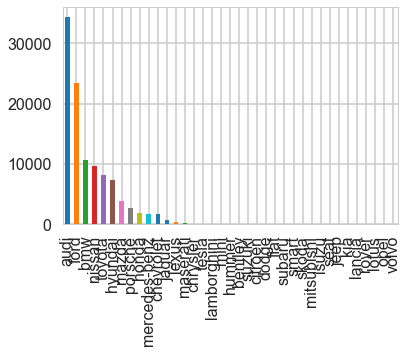

In [17]:
price_mileage_df = data1_subset_cleaned[["price_eur", "mileage"]]
data1_subset_cleaned['maker'].value_counts().plot(kind = 'bar')
# What we could infer from the above screenshot is that cars from makers such as audi, opel,
# ford etc had highest number of cars available in the used car market for re-sale.

Text(0,0.5,'Price')

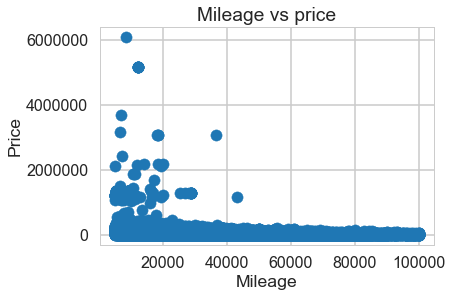

In [18]:
plt.scatter(data1_subset_cleaned['price_eur'],  data1_subset_cleaned['mileage'])
plt.title("Mileage vs price")
plt.xlabel("Mileage")
plt.ylabel("Price")
#From the above analysis, we can infer that lesser the mileage of the car, higher the price ( or residual value) of the car.

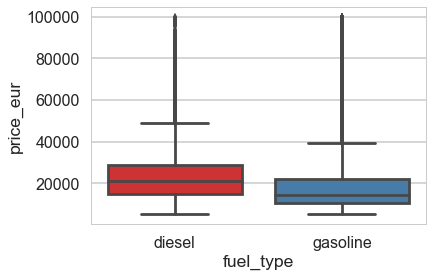

In [20]:
#Shows an even distribution of diesel and gasoline
#plt.scatter(data1_subset_cleaned['fuel_type'],  data1_subset_cleaned['price_eur'])
ax1 = sns.boxplot(x='fuel_type', y = 'price_eur', data = data1_subset_cleaned, palette = "Set1")

# We can conclude from the boxplot below that the average resale price of a diesel vehicle is much higher than the 
# corresponding gasoline fueled car. Not only is the mean price higher for a diesel based vehicle, but it remains higher
# even after one deviation, (both one deviation above and below). 

In [21]:
#Since manufacture year is a categorical value inorder to apply linear regression
#we convert the categorical varibale to ordered continuous variable and assigning in new column called AgeOfCar
data1_subset_cleaned.info()
data1_subset_cleaned['Current Year'] = datetime.datetime.now().year
data1_subset_cleaned['AgeOfCar']=data1_subset_cleaned['Current Year']-data1_subset_cleaned['manufacture_year']
data1_subset_cleaned.info()
data1_subset_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107377 entries, 0 to 1048516
Data columns (total 7 columns):
maker               107377 non-null category
model               107377 non-null category
mileage             107377 non-null float64
manufacture_year    107377 non-null float64
price_eur           107377 non-null float64
fuel_type           107377 non-null object
fuel_count          107377 non-null float64
dtypes: category(2), float64(4), object(1)
memory usage: 10.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 107377 entries, 0 to 1048516
Data columns (total 9 columns):
maker               107377 non-null category
model               107377 non-null category
mileage             107377 non-null float64
manufacture_year    107377 non-null float64
price_eur           107377 non-null float64
fuel_type           107377 non-null object
fuel_count          107377 non-null float64
Current Year        107377 non-null int64
AgeOfCar            107377 non-null float64
dtypes: 

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,maker,model,mileage,manufacture_year,price_eur,fuel_type,fuel_count,Current Year,AgeOfCar
0,ford,galaxy,151000.0,2011.0,10584.75,diesel,23897.304953,2018,7.0
36,ford,focus,159427.0,2012.0,8771.28,diesel,23897.304953,2018,6.0
37,ford,galaxy,160235.0,2012.0,11102.89,diesel,23897.304953,2018,6.0
46,audi,a8,4000.0,2014.0,98692.30,diesel,23897.304953,2018,4.0
53,ford,mondeo,164867.0,2012.0,11102.89,diesel,23897.304953,2018,6.0


In [58]:
# Run linear regression for predictor variable 'mileage' with 'price_eur' as target variable
df_standard = data1_subset_cleaned[['mileage', 'price_eur']]

lm  = LinearRegression()
X = data1_subset_cleaned[['mileage']]
Y = data1_subset_cleaned['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test,Y_pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                 7.751e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        03:46:11   Log-Likelihood:            -3.5418e+05
No. Observations:               32214   AIC:                         7.084e+05
Df Residuals:                   32213   BIC:                         7.084e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9995      0.004    278.400      0.000       0.992       1.007
==============================================================================
Omnibus:                    12653.574   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50170.693
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                       7.687   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

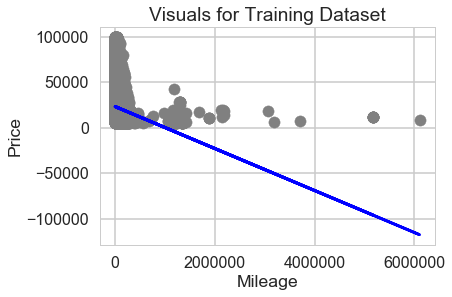

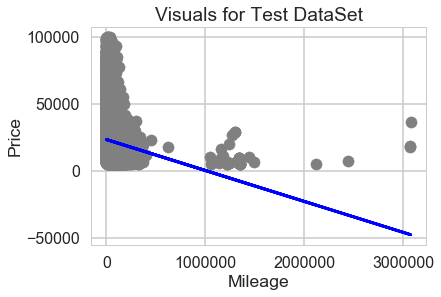

In [59]:
#Visualizing the training Test Results 
plt.scatter(X_train, Y_train, color= 'gray')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, Y_test, color= 'gray')
plt.plot(X_test, lm.predict(X_test), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [39]:
np.random.seed(1)
df_standard = data1_subset_cleaned[['mileage', 'price_eur']]

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_standard)
scaled_df = pd.DataFrame(scaled_df, columns=['mileage', 'price_eur'])

lm  = LinearRegression()
X = scaled_df[['mileage']]
Y = scaled_df['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test, X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     771.7
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          7.24e-168
Time:                        03:28:27   Log-Likelihood:                -45243.
No. Observations:               32214   AIC:                         9.049e+04
Df Residuals:                   32213   BIC:                         9.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mileage       -0.1661      0.006    -27.780      0.000      -0.178      -0.154
==============================================================================
Omnibus:                    12897.118   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52651.000
Skew:                           1.993   Prob(JB):                         0.00
Kurtosis:                       7.832   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#Predicts the car price using  age of car and price.
np.random.seed(1)
df_standard = data1_subset_cleaned[['AgeOfCar', 'price_eur']]

lm  = LinearRegression()
X = data1_subset_cleaned[['AgeOfCar']]
Y = data1_subset_cleaned['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test,Y_pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 8.016e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        03:46:53   Log-Likelihood:            -3.5387e+05
No. Observations:               32214   AIC:                         7.077e+05
Df Residuals:                   32213   BIC:                         7.077e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9980      0.004    283.131      0.000       0.991       1.005
==============================================================================
Omnibus:                    12781.717   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51896.540
Skew:                           1.974   Prob(JB):                         0.00
Kurtosis:                       7.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Uses all predictor variables, with model and make one-hot-encoded: 99.89% accuracy
# Using the model and make does increase the accuracy

#As we know, for a categorical ordered dataset, we cannot apply linear regression. In-order to bring in the featured variables
#into linear regression analysis, we used one hot encoding.
#One hot encoding is a technique where categorical variables are converted to a binary value matrix where 
#the occurrence of a value is represented by 1
#Since, linear regression or machine learning techniques cannot work with categorical variable directly, 
#we need to use such a technique. Also bringing in categorical variables into our analysis may give us better prediction.

one_hot_encode_make = pd.get_dummies(data1_subset_cleaned['maker'])
data1_subset_cleaned_encoded = pd.concat([data1_subset_cleaned, one_hot_encode_make], axis=1)

X_temp = data1_subset_cleaned_encoded.loc[:, data1_subset_cleaned_encoded.columns != 'price_eur']
X_temp = X_temp.loc[:, X_temp.columns != 'fuel_type']
X_temp = X_temp.loc[:, X_temp.columns != 'fuel_count']
X_temp = X_temp.loc[:, X_temp.columns != 'maker']
X_temp = X_temp.loc[:, X_temp.columns != 'model']

X = X_temp
Y = data1_subset_cleaned_encoded['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test,Y_pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 1.939e+05
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        03:47:14   Log-Likelihood:            -3.4291e+05
No. Observations:               32214   AIC:                         6.858e+05
Df Residuals:                   32213   BIC:                         6.858e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0072      0.002    440.335      0.000       1.003       1.012
==============================================================================
Omnibus:                    13670.017   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89361.361
Skew:                           1.925   Prob(JB):                         0.00
Kurtosis:                      10.194   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Extract only those rows where the make of the car is Toyota. The reason we filter is to combine this data with another dataset
# bring in the column 'color' and see if there is any influence of color on prediction
data1_latent = data1_subset.drop(data1_subset[data1_subset.maker != "toyota"].index)
data1_latent.drop(['maker'], axis=1, inplace=True)

#Select model, price and mileage
data1_latent = data1_latent[['model', 'mileage', 'price_eur']]
data1_latent['color'] = "No color"

data1_latent.columns = data1_latent.columns.str.replace('price_eur','price')

In [43]:
#importing toyota cars dataset
data2 = pd.read_csv('C:/Users/Supreetha/Box Sync/MSSE/THIRD_SEM/257_ML/datasets/usedcars.csv')
#Select model, price and mileage
data2 = data2[['model', 'mileage', 'price', 'color']]
data2.dropna(inplace= True)
data2 = data2.drop(data2[data2.price < 5000].index)
data2 = data2.drop(data2[data2.price > 100000].index)

data2 = data2.drop(data2[data2.mileage < 500].index)
data2 = data2.drop(data2[data2.mileage > 200000].index)

In [44]:
data1_latent = data1_latent.append(data2)
data1_latent.dropna(inplace=True)

In [50]:
data1_latent.head()

,model,mileage,price,color
67,auris,5.0,14985.20,No color
68,aygo,5.0,8878.57,No color
127,avensis,113457.0,12213.18,No color
136,aygo,14221.0,6328.65,No color
317,yaris,45000.0,6883.79,No color


In [62]:
#With color:
one_hot_encode_model = pd.get_dummies(data1_latent['model'])
one_hot_encode_color = pd.get_dummies(data1_latent['color'])

data3_df = pd.concat([data1_latent, one_hot_encode_color, one_hot_encode_model], axis=1)

data3_df = data3_df.reset_index()
X_temp = data3_df.loc[:, data3_df.columns != 'price']
X_temp = X_temp.loc[:, X_temp.columns != 'model']
X_temp = X_temp.loc[:, X_temp.columns != 'color']


X = X_temp
Y = data3_df['price']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test,Y_pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 3.780e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        03:47:29   Log-Likelihood:                -27164.
No. Observations:                2783   AIC:                         5.433e+04
Df Residuals:                    2782   BIC:                         5.434e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0124      0.005    194.426      0.000       1.002       1.023
==============================================================================
Omnibus:                     1267.890   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40585.249
Skew:                           1.528   Prob(JB):                         0.00
Kurtosis:                      21.457   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Without color

one_hot_encode_model = pd.get_dummies(data1_latent['model'])

data3_df = pd.concat([data1_latent, one_hot_encode_model], axis=1)

data3_df = data3_df.reset_index()
X_temp = data3_df.loc[:, data3_df.columns != 'price']
X_temp = X_temp.loc[:, X_temp.columns != 'model']
X_temp = X_temp.loc[:, X_temp.columns != 'color']

X = X_temp
Y = data3_df['price']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test, X_test)
result = model.fit()
result.summary()

C:\Users\Supreetha\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Supreetha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Supreetha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Supreetha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     392.9
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        03:33:29   Log-Likelihood:                -26712.
No. Observations:                2783   AIC:                         5.347e+04
Df Residuals:                    2759   BIC:                         5.361e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
index             0.0002      0.000      0.791      0.429      -0.000       0.001
mileage          -0.0444      0.001    -31.673      0.000      -0.047      -0.042
SE             1.445e+04    959.025     15.065      0.000    1.26e+04    1.63e+04
SEL             1.81e+04   1080.416     16.751      0.000     1.6e+04    2.02e+04
SES            1.528e+04    803.856     19.012      0.000    1.37e+04    1.69e+04
auris          1.625e+04    197.937     82.097      0.000    1.59e+04    1.66e+04
avensis        1.878e+04    289.125     64.963      0.000    1.82e+04    1.93e+04
avensis-verso  1.834e-05   3.08e-06      5.964      0.000    1.23e-05    2.44e-05
aygo           8749.2064    227.455     38.466      0.000    8303.207    9195.206
camry          1.501e+04   3584.911      4.187      0.000    7981.395     2.2e+04
carina          1.86e+04   3584.819      5.187      0.000    1.16e+04    2.56e+04
corolla        1.471e+04    968.130     15.194      0.000    1.28e+04    1.66e+04
corolla-verso  1.278e+04   1474.880      8.668      0.000    9892.755    1.57e+04
fj-cruiser     5.291e+04   2537.195     20.853      0.000    4.79e+04    5.79e+04
gt86           2.274e+04    858.184     26.503      0.000    2.11e+04    2.44e+04
highlander     1.577e-07   2.64e-08      5.964      0.000    1.06e-07     2.1e-07
hilux          2.515e+04    488.840     51.448      0.000    2.42e+04    2.61e+04
iq             1.048e+04    555.899     18.860      0.000    9394.500    1.16e+04
land-cruiser   4.145e+04    426.089     97.291      0.000    4.06e+04    4.23e+04
prius          1.894e+04    435.294     43.515      0.000    1.81e+04    1.98e+04
proace         1.724e+04   1467.214     11.748      0.000    1.44e+04    2.01e+04
rav4           2.199e+04    335.643     65.514      0.000    2.13e+04    2.26e+04
runner         1.668e+04   2538.375      6.569      0.000    1.17e+04    2.17e+04
sequoia        -5.27e-13   3.23e-14    -16.292      0.000    -5.9e-13   -4.64e-13
sienna                 0          0        nan        nan           0           0
tundra         5.664e+04   1470.446     38.516      0.000    5.38e+04    5.95e+04
verso          1.669e+04    275.763     60.525      0.000    1.61e+04    1.72e+04
yaris          1.186e+04    188.308     63.008      0.000    1.15e+04    1.22e+04
==============================================================================
Omnibus:                     1944.239   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116677.751
Skew:                           2.665   Prob(JB):                         0.00
Kurtosis:                      34.270   Cond. No.                     3.07e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of